In [14]:
import pm4py


In [ ]:
log = pm4py.read_xes("..\\..\\Dataset\\BPI Challenge 2017.xes")
net, initial_marking, final_marking = pm4py.discover_petri_net_heuristics(log)
pm4py.view_petri_net(net, initial_marking, final_marking)

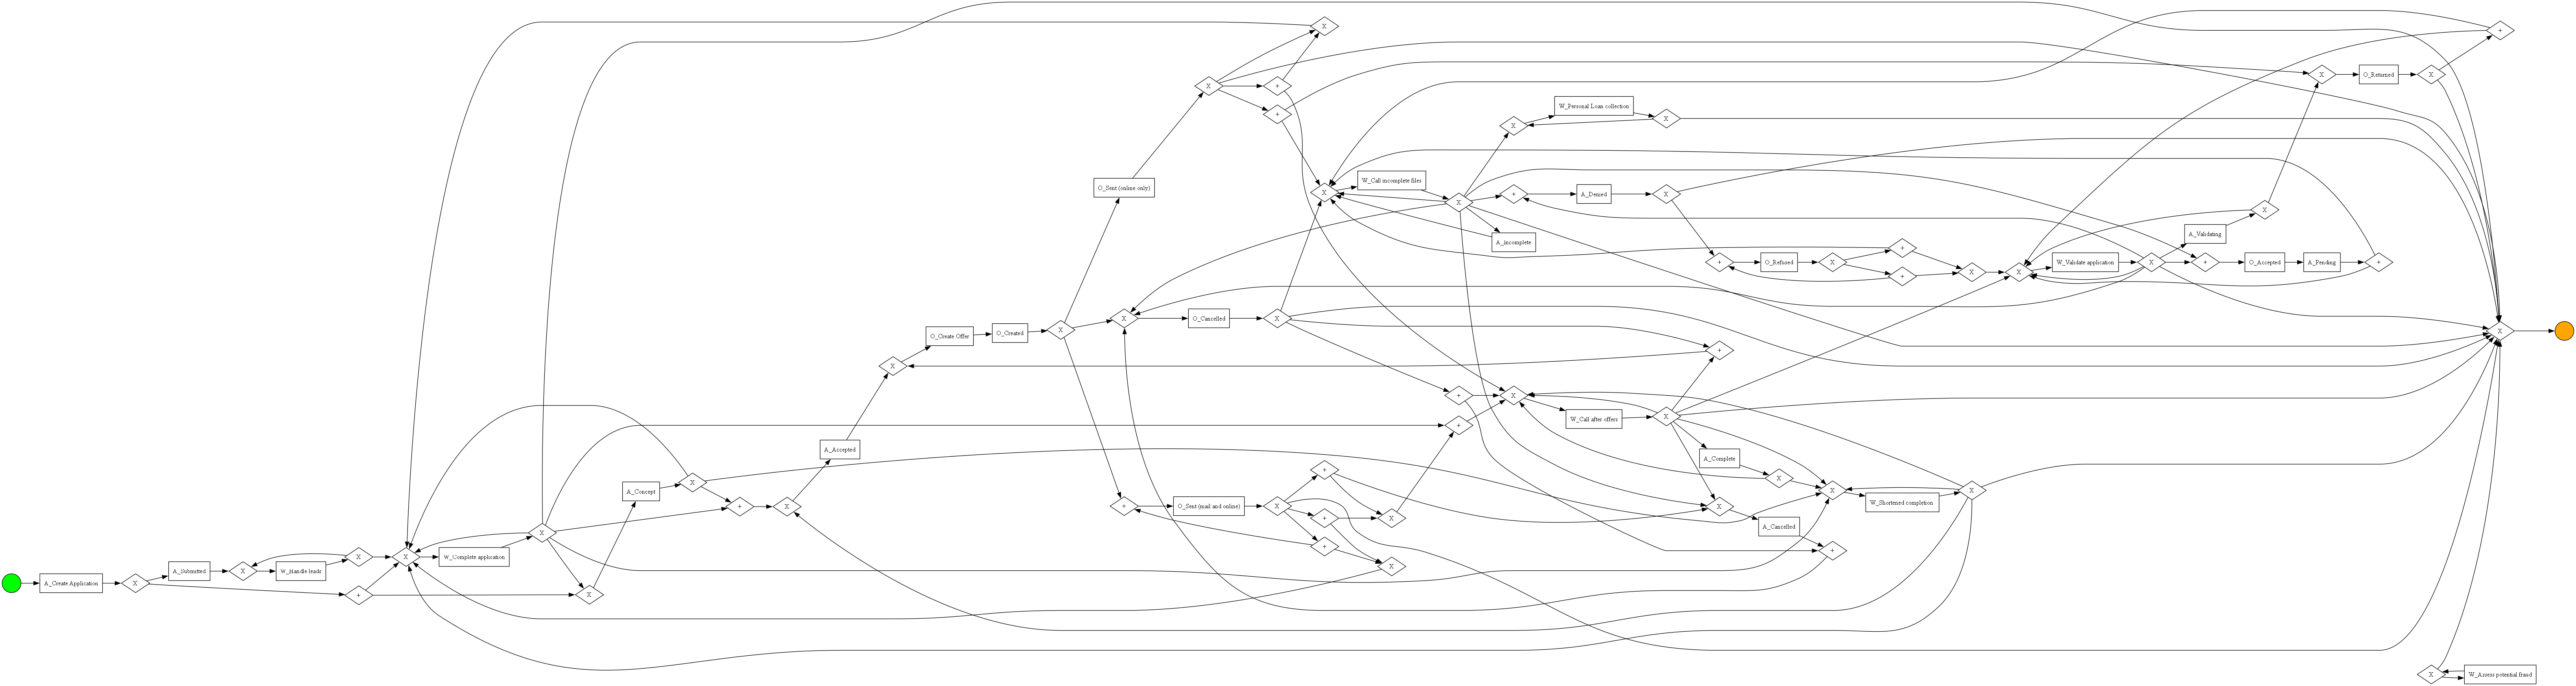

''

In [ ]:
bpmn = pm4py.convert_to_bpmn(net, initial_marking, final_marking)
pm4py.view_bpmn(bpmn)
pm4py.save_vis_bpmn(bpmn, "bpmn.jpeg")

In [ ]:
# List to store XOR gateways
xor_gateways = []

# Iterate over all nodes
for node in bpmn.get_nodes():
    # Check if node is an exclusive gateway
    if node.type == "exclusiveGateway":
        # Collect outgoing flows
        out_flows = [flow for flow in bpmn.get_flows() if flow.source == node]
        xor_gateways.append({
            "name": node.name,
            "num_branches": len(out_flows),
            "branches": [flow.target.name for flow in out_flows]
        })

# Print results
for xor in xor_gateways:
    print(f"XOR gateway '{xor['name']}' has {xor['num_branches']} outgoing branches:")
    for branch in xor['branches']:
        print("  ->", branch)

AttributeError: 'BPMN' object has no attribute '__nodes'